<a href="https://colab.research.google.com/github/formroller/ML_clone/blob/master/kaggle/pima/diabetesPrediction(knn1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Step by Step Diabetes Classification-KNN-detail](https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed)

- 피마 인디언 당뇨병 예측(단계별 KNN)

# 1.Introduce

* 개요  
 이 데이터 세트는 미국 국립 당뇨병 연구소에서 가져온 것이다. 데이터 세트의 목적은 데이터 세트에 포함된 특정 진단값을 기반으로 환자에게 당뇨병이 있는 여부를 진단적으로 예측하는 것이다. 더 큰 데이터 베이스에서 이러한 인스턴스를 선택하는데 몇 가지 제약이 있다. 특히 여기 모든 환자는 피마 인디언 혈통의 최소 21세 여성이다.  

* 내용  
 데이터 세트는 여러 의료 예측 변수와 하나의 대상 변수인 OUTCOME(결과)로 구성된다. 예측 변수에는 환자의 임신 횟수, BMI, 인슐린 수준, 나이 등의 변수가 포함된다. 

* 목표    
 **데이터 세트의 환자에게 당뇨병이 있는지 여부를 정확하게 예측하는 기계 학습 모델 구축.**

# 2.Load Package

In [ ]:
import os
os.chdir('/content/drive/MyDrive/kaggle/pima/')

from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

<module 'warnings' from '/usr/lib/python3.7/warnings.py'>

# 3.기초 Data Science 및 ML 파이프라인
Basic Data Science and ML Pipline

## OSEMN Pipline
* O - Obtaining our data
    (데이터 획득)
* S - Scrubbing / Cleaning our data
    (데이터 정제)
* E - Exploring / Visualizing our data will allow us to find pattern and trends
    (탐색 / 데이터 시각화를 통헤 패턴과 추세를 찾을 수 있다.)
* M - Modeling our data will give us our predictive power as a wizard
    (데이터 모델링은 마법사로서 예측 능력을 제공한다.)
* N - INterpreting our data
    (데이터 해석)

> For reference : https://www.linkedin.com/pulse/life-data-science-osemn-randy-lao/?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_post_details%3BmDlg5VsdSBCLBps2R0vRZA%3D%3D

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 4.기초 EDA 및 통계 분석
Basic EDA and Statistical analysis

In [ ]:
# gives information about the data types, columns, null value counts, memory ussage etc
# function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html
diabetes.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**DataFrame.describe()** 방법은 NaN값을 제외하고 데이터 집합 분포의 중심 위치, 분산 및 모양을 요약하는 기술 통계량을 생성한다. 이 방법은 데이터 세트에 대해 많은 것을 알려준다. **describe()** 메소드의 중요한 점 하나는 오직 수치형 변수만 사용 가능하고 범주형 변수는 사용할 수 없다. 따라서 열에 범주형 값이 있는 경우 describe() 메서드는 이를 무시하고 매개 변수 include='all'이 전달되지 않는 한 다른 열에 대한 요약을 표시한다.   

이제 describe() 방법으로 생성되는 통계를 이해해본다. 
* Count tells us the number of NoN-empty rows in a feature.
 - count는 변수에서 비어있지 않은 행의 수를 알려준다. 
* Mean tell us the mean value of that feature.
 - mean는 변수의 평균값을 알려준다.
* Std tell us Stnadard Deviation Value of that feature.
 - std는 변수의 표준 편차를 알려준다.
* Min tell us the minimum value of that feature
 - min은 변수의 최솟값을 알려준다.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
 - 25%, 50%, 75%는 각 기능의 백분위수/사분위수 이다. 이 사분위수는 이상치를 감지하는데 도움이 된다.
* Max tell us the maximum value of that feature.
 - max는 변수의 최댓값을 알려준다.

In [ ]:
# basic statistic details about the data (note only numerical columns would be displayed here unless parameter include='all')
# -> 데이터에 대한 기본 통계 세부 정보(include='all'을 포함하지 않는 한 수치형 열만 표시된다.)
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## 4.1 이 요약에서 나오는 질문
 **아래 나열된 열의 최솟값은 0일수 있는가?**  
  이러한 열에서 0값은 의미가 없으므로 결측값을 나타낸다.

  다음 열 또는 변수에 잘못된 0값이 있다.
  1. Glucose
  2. BloodPressure
  3. SkinThickness
  4. Insulin
  5. BMI

이들에 대해 0을 NaN으로 바꾸는 것이 더 낫다. 0을 세는 것이 더 쉬워지고 0은 더 적절한 값으로 대체되어야 하기 때문이다. 


In [ ]:
# diabetes_copy = diabetes.copy(deep=True)
# diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# # showing the count of Nans
# print(diabetes_copy.isnull().sum())


diabetes_copy = diabetes.copy(deep = True)
diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


결측값을 채우기 위해서는 데이터 분포를 이해해야 한다. 

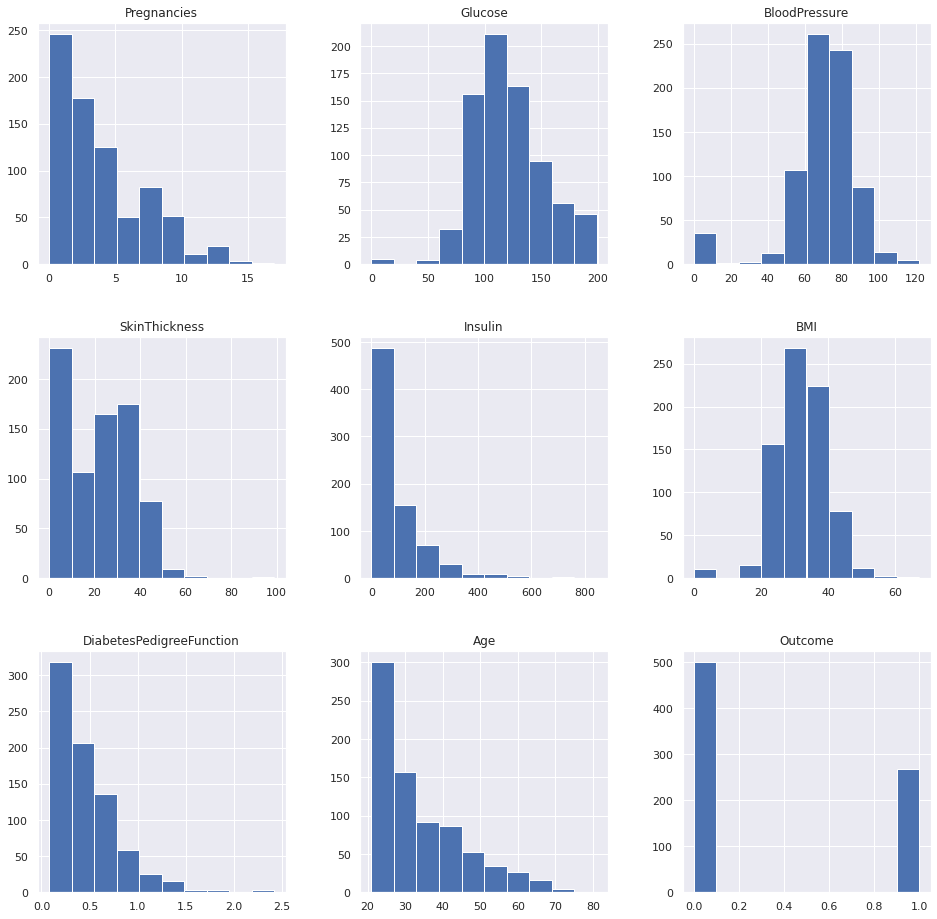

In [ ]:
p = diabetes.hist(figsize=(16,16))

 열의 분포에 따라 nan값을 대치하는 것을 목표로 한다. 

In [ ]:
diabetes_copy['Glucose'].fillna(diabetes_copy['Glucose'].mean(), inplace=True)
diabetes_copy['BloodPressure'].fillna(diabetes_copy['BloodPressure'].mean(), inplace=True)
diabetes_copy['SkinThickness'].fillna(diabetes_copy['SkinThickness'].mean(), inplace=True)
diabetes_copy['Insulin'].fillna(diabetes_copy['Insulin'].mean(), inplace=True)
diabetes_copy['BMI'].fillna(diabetes_copy['BMI'].mean(), inplace=True)

## 4.2 결측치 제거 후 플롯팅
Plotting after Nan Removal

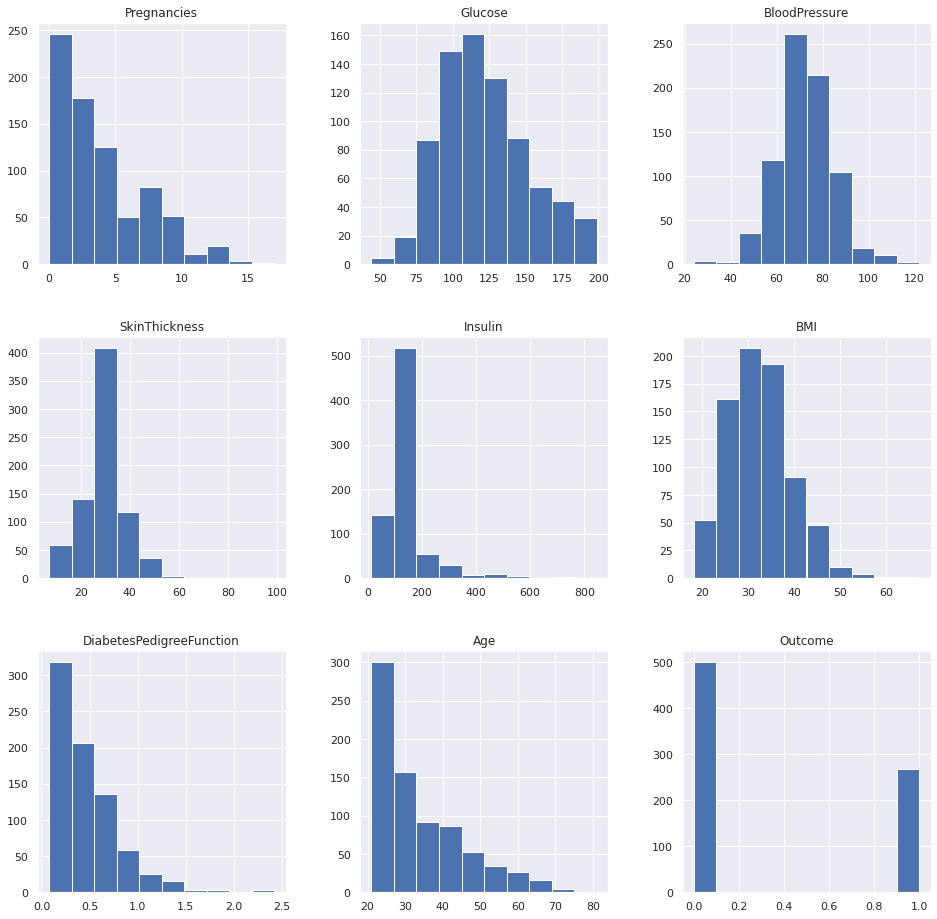

In [ ]:
p = diabetes_copy.hist(figsize=(16, 16))

## 4.3 Skenwness (왜도)
* 왼쪽으로 치우친 분포는 왼쪽 꼬리가 길다. 왼쪽으로 치우친 분포는 또한 음의 왜도 분포라고 불린다. 이는 숫자 라인에 음의 방향의 긴 꼬리가 있기 때문이다. 평균값 또한 정점의 왼쪽에 있다.

* 오른쪽으로 치우친 분포는 오른쪽으로 꼬리가 길다. 오른쪽으로 치우친 분포는 양의 왜도라 불린다. 이는 숫자 라인에 양의 방향의 긴 꼬리가 있기 때문이다. 평균값 또한 정점의 오른쪽에 있다.

> [왜도에 대해 더 알아보기](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/)

In [ ]:
# 데이터 모양 관찰
diabetes.shape

(768, 9)

In [ ]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


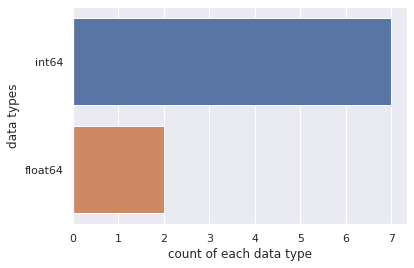

In [ ]:
# # 데이터 타입 분석
# # plt.figure(figsize=(5,5))
# # sns.set(font_scale=2)
sns.countplot(y=diabetes.dtypes.map(str), data=diabetes)  # 열 별 데이터 타입 count위해 열 이름을 문자형으로 변경
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

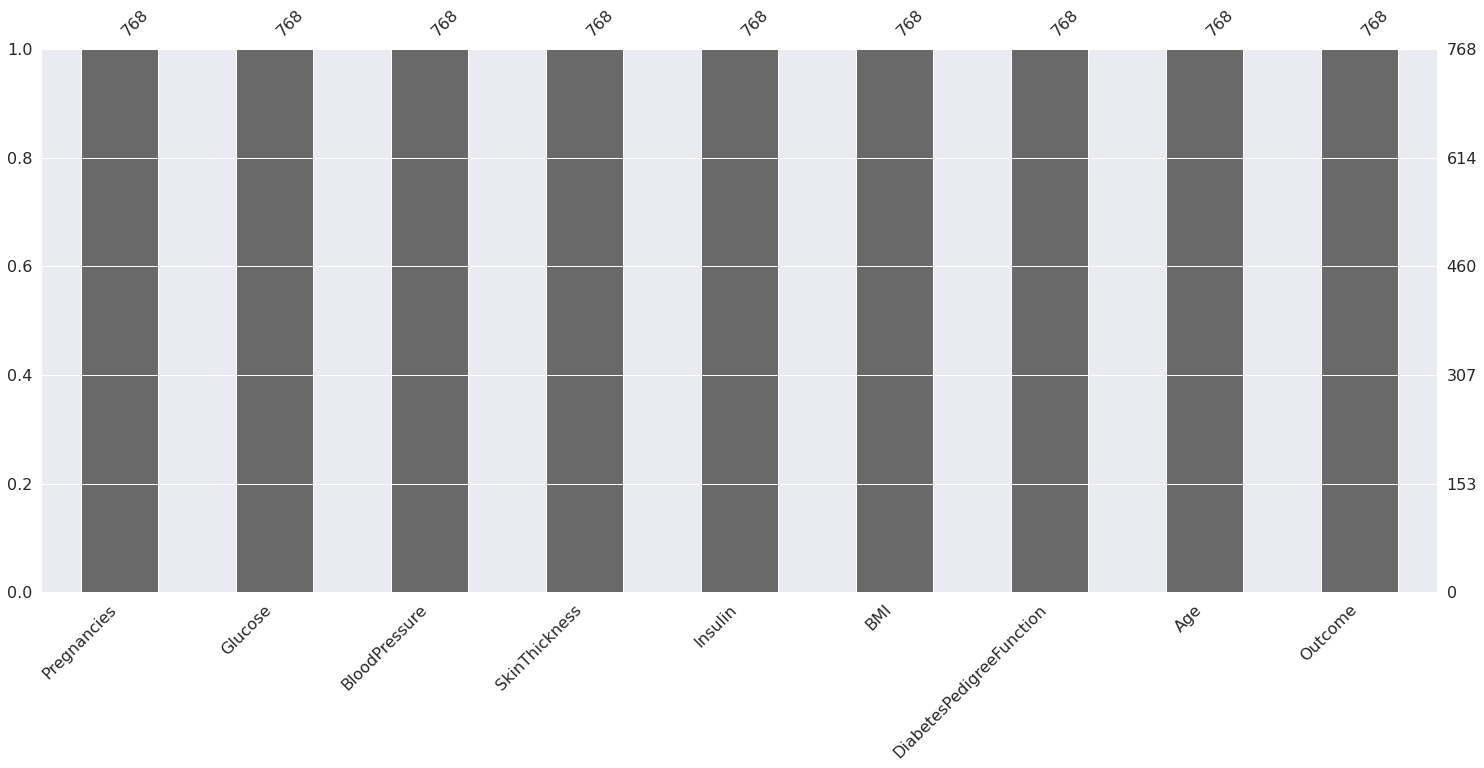

In [ ]:
# null count analysis
import missingno as msno
p = msno.bar(diabetes)

0    500
1    268
Name: Outcome, dtype: int64


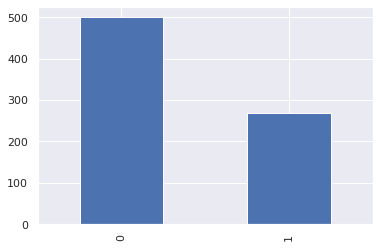

In [ ]:
# Checking the balance of the data by plotting the count of coutcomes by their value
color_wheel = {1:"#0392cf", 2:"#7bc043"}

colors = diabetes['Outcome'].map(lambda x : color_wheel.get(x + 1))
print(diabetes.Outcome.value_counts())

p = diabetes.Outcome.value_counts().plot(kind='bar')

위 그래프는 데이터 결과 값이 0인 데이터 포인트 쪽으로 편향되어 있음을 보여주며 이는 당뇨병이 실존하지 않았음을 의미한다.  

당뇨가 아닌 환자 수는 당뇨환자의 거의 두 배이다.

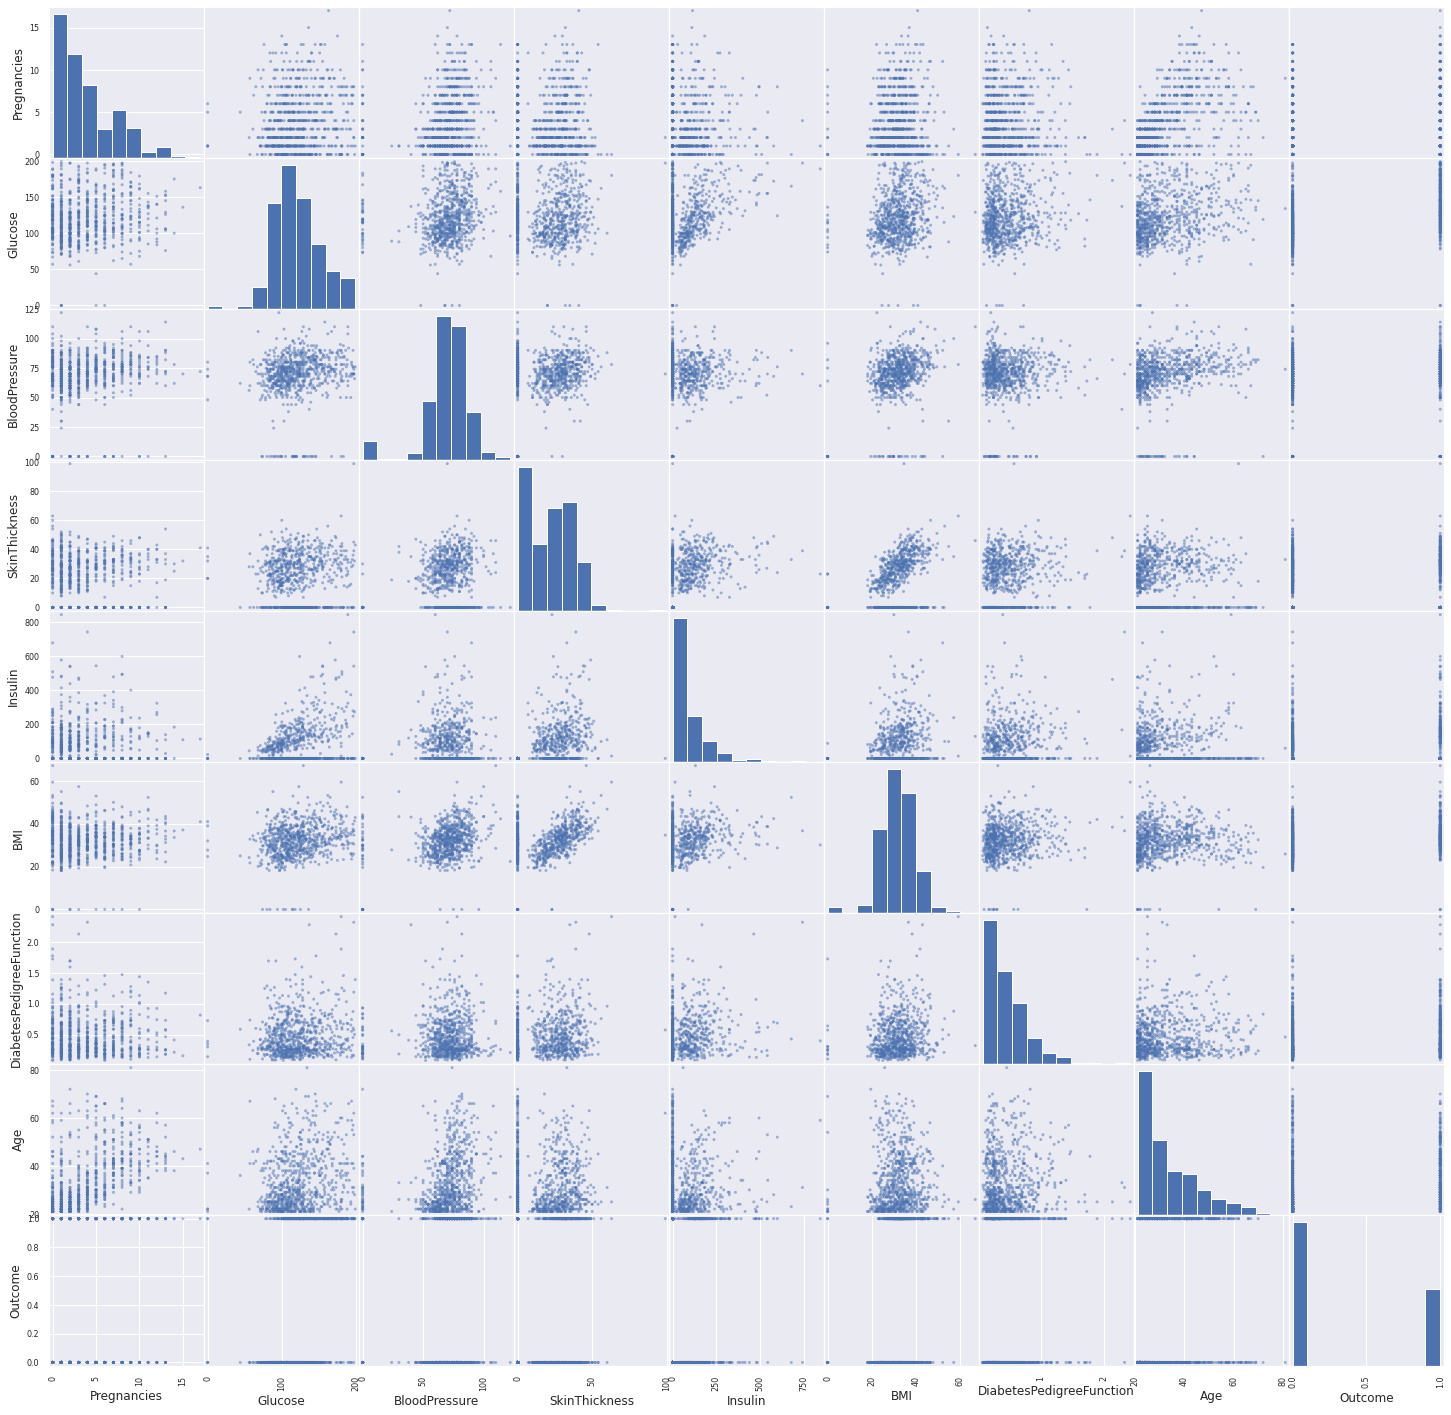

In [ ]:
# 정리되지 않는 데이터의 산점 행렬도
from pandas.plotting import scatter_matrix
p = scatter_matrix(diabetes, figsize=(25,25))

pair plot은 히스토그램과 산점도라는 두 가지 기본 그림을 기반으로 한다. 대각선의 히스토그램을 통해 단일 변수의 분포를 확인할 수 있지만, 위쪽과 아래쪽 삼각형의 산점도는 두 변수 사이의 관계(또는 관계 없음)을 보여준다. 

> [pair plot 참조](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)

## 4.4 Pair plot for clean data

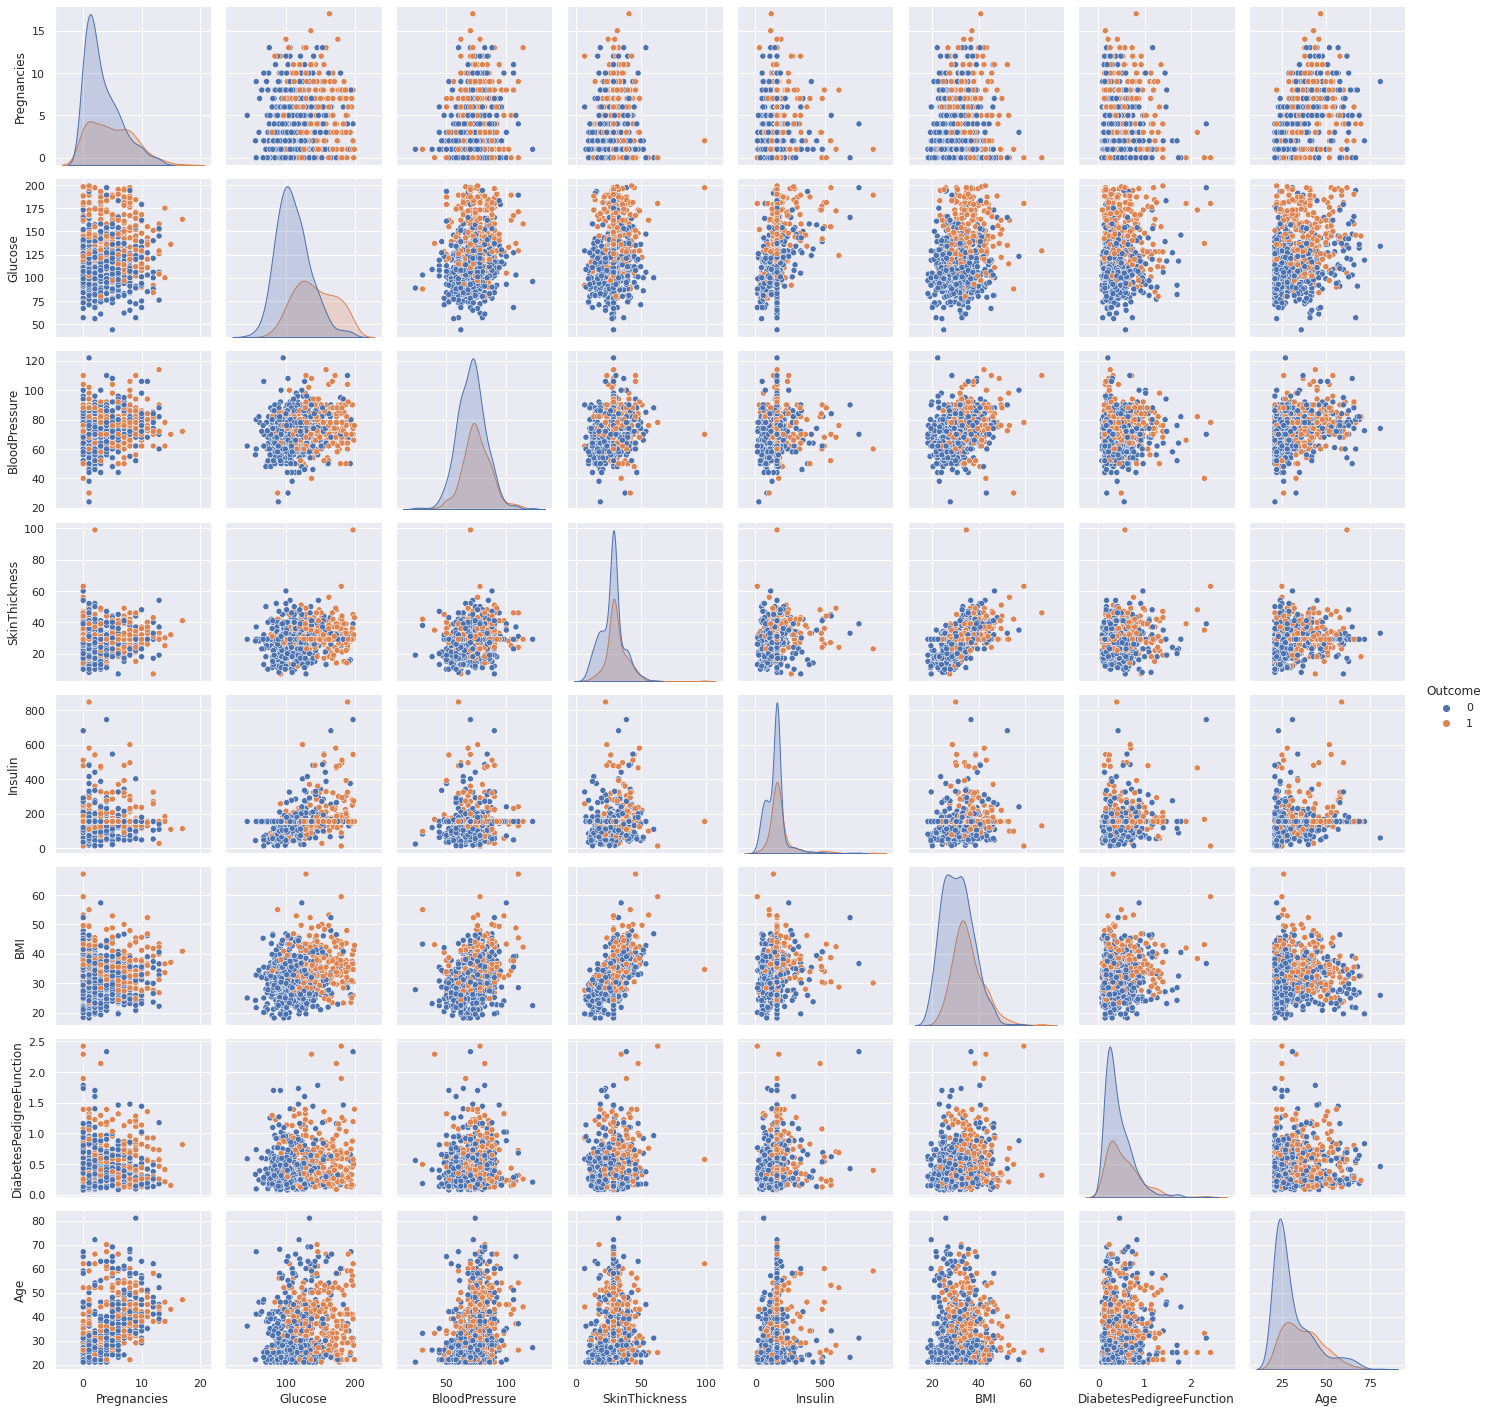

In [ ]:
p = sns.pairplot(diabetes_copy, hue = 'Outcome')

# 5.피어슨 상관계수(Heatmap)

**피어슨(Pearson) 상관 계수** 
* 두 수량 간의 도움을 찾는데 도움이 된다. 
* 두 변수 간의 연관성 강도를 측정한다. 
* Pearson의 상관계수 값은 -1에서 +1 사이일 수 있으며 1은 높은 상관관계를, 0은 상관관계가 없음을 의미한다. 

히트맵은 색상을 사용해 정보를 2차원으로 표현한 것이다. 히트맵은 사용자가 단순하거나 복잡한 정보를 시각화하는데 도움이 될 수 있다.

## 5.1 Heatmap for unclean data

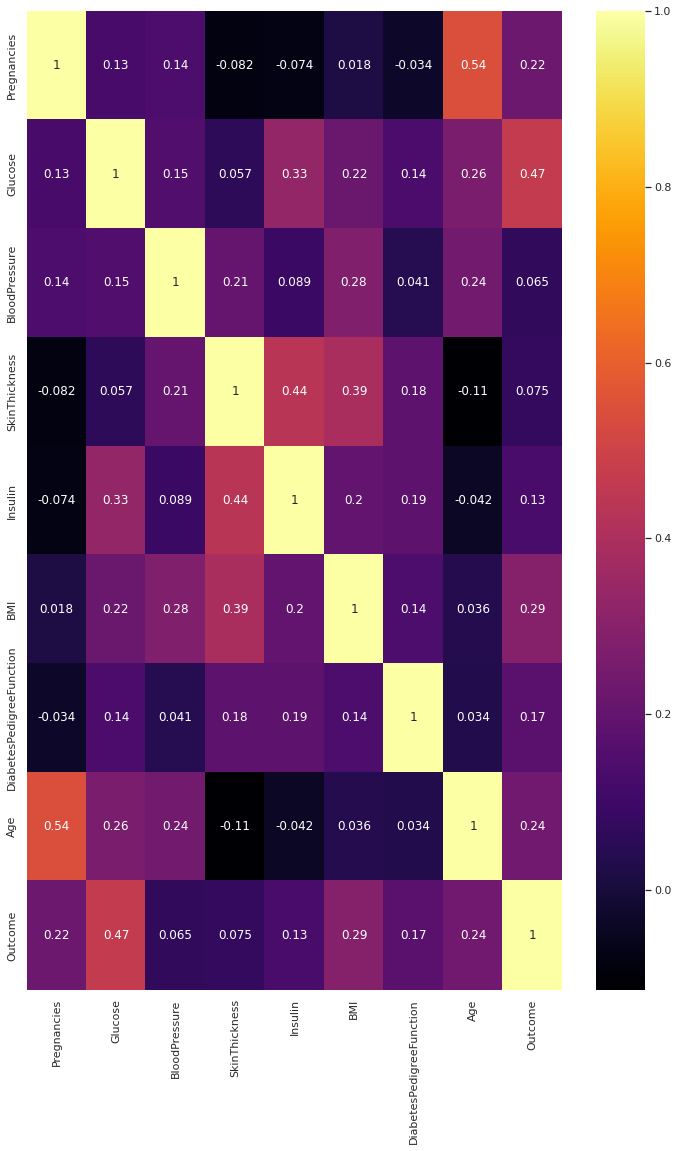

In [ ]:
plt.figure(figsize=(12,18))  
p = sns.heatmap(diabetes.corr(), annot=True, cmap='inferno')

## 5.2 Heatmap for clean data

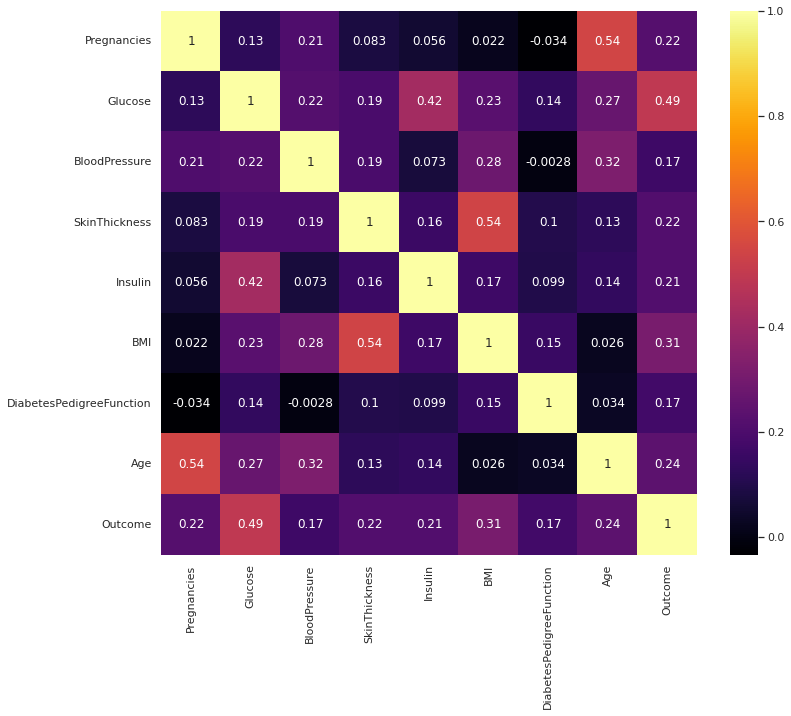

In [ ]:
plt.figure(figsize=(12,10))
p = sns.heatmap(diabetes_copy.corr(), annot=True, cmap='inferno')

## 5.3 데이터 정규화
데이터 Z는 μ(평균) = 0,  𝛔(표준편차) = 1이 되도록 스케일 조정되며, 다음 공식을 통해 계산된다.   
* μ, 평균
* 𝛔, 표준편차


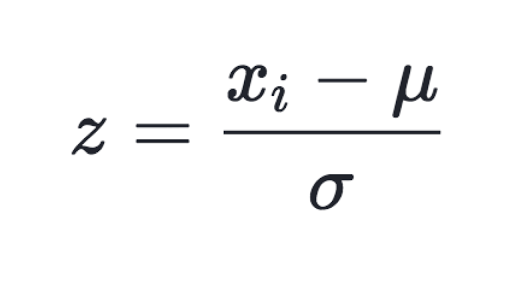


>[스케일링에 대해 더 알아보기](https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(diabetes_copy.drop(['Outcome'],axis=1)), columns=diabetes_copy.columns[:-1])

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [ ]:
# X = diabetes.drop('Outcome', axis=1)
y = diabetes_copy.Outcome

## 5.4 KNN을 위해 스케일링하는 이유는?
**KNN과 같은 거리 기반 알고리즘을 적용하기 위해서는 항상 모든 형상을 동일한 척도로 가져오는 것이 바람직하다.**  

크기/범주가 크게 다른 두 가지 형상을 사용한 거리 계산의 예를 살펴보자.
$$Euclidean Distance = [(100000–80000)^2 + (30–25)^2]^(1/2)$$

범위가 크거나 작은 변수들을 완전히 무색하거나 희미하게 만드는 특징을 상상할 수 있으며, 이는 크기가 더 큰 변수에 더 높은 가중치를 부여하기 때문에 모든 거리 기반 모델 성능에 영향을 미칠 것이다. 

# 6.Test Train Split and Cross Validation Methods
> [참고](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)

## 6.1 Train Test Split
* *Train Test Split*  : 모형이 훈련된 동일한 포인트로 테스트하는 대신 데이터를 테스트하기 위해 알 수 없는 데이터 포인트를 사용한다. 따라서 모델 성능을 훨씬 더 잘 포착할 수 있다.
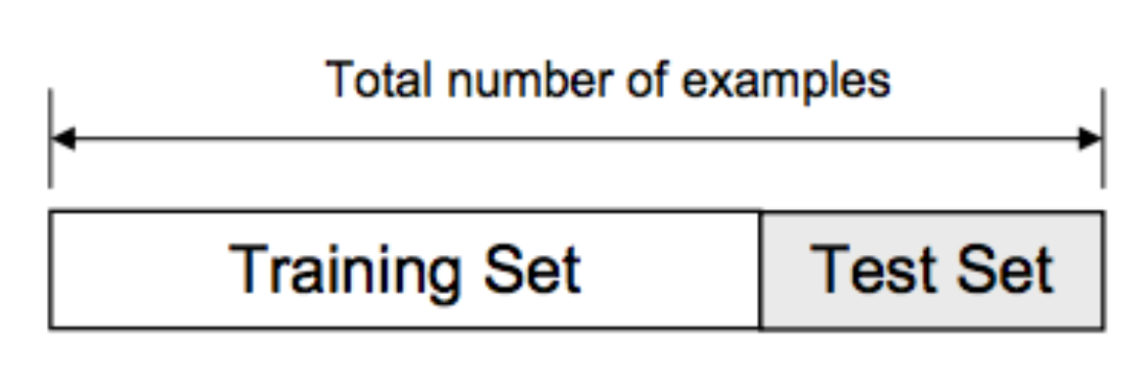

## 6.2 Cross Validation
* *Cross Validation* : 모델을 훈련과 테스트로 나눌 때 특정 유형의 데이터 포인트가 완전히 훈련 또는 테스트 부분으로 들어갈 수 있다.
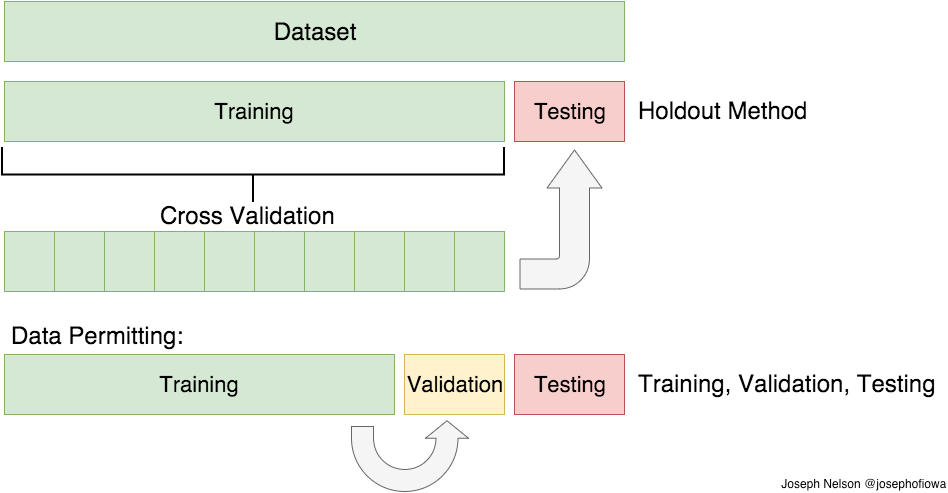

## 6.3 Stratify
* *About Stratify* : 계층화 매개변수는 생성된 샘플의 값 비율이 매개 변수 계층화에 제공된 값의 비율과 동일하도록 분할한다.   

예를 들어, 변수 y가 0과 1인 이진 범주형 변수이고, 0이 25%, 1이 75%가 있는 경우 stratify=y는 임의 분할에 위의 분포를 갖는지 확인한다.(0=25%, 1=75%)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
# 교육에 사용된 동일한 데이터 포인트에 대한 테스트에서 얻은 점수
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {}% * and k ={}'.format(max_train_score*100, list(map(lambda x : x+1, train_scores_ind))))

Max train score 100.0% * and k =[1]


In [ ]:
# 테스트용으로만 사용하기 위해 처음에 분할된 데이터 포인트에 대한 테스트에서 나온 점수
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {}% * and k ={}'.format(max_test_score*100, list(map(lambda x : x+1, test_scores_ind))))

Max test score 76.171875% * and k =[11]


## 6.4 Result Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


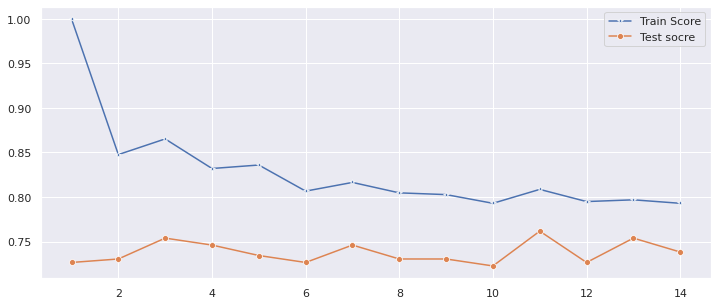

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15), train_scores, marker='*', label = 'Train Score')
p = sns.lineplot(range(1,15), test_scores, marker='o', label = 'Test socre')

최적의 결과는 k=11에서 확인되므로 최종 모델에 11을 사용한다.

In [ ]:
# k개의 이웃으로 knn분류기를 설정한다.
knn = KNeighborsClassifier(11)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.76171875

## 6.5 의사 결정 경계 플롯 시도
trying to plot decision boundary 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:313: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  **scatter_highlight_kwargs)


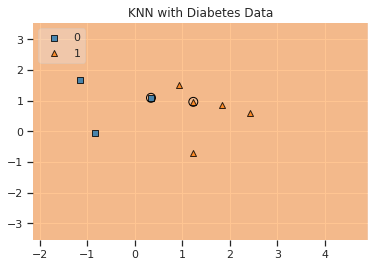

In [ ]:
value = 20000
width = 20000

plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)
# Adding axes annotatinos
# plt.xlabel('sepal length [cm]')
# plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

# 7.Model Performance Analysis


## 7.1 Confusion Matrix
혼동 행렬은 분류 알고리즘의 성능을 요약하는데 사용되는 기술이다. 즉, 이진 출력이 있다.

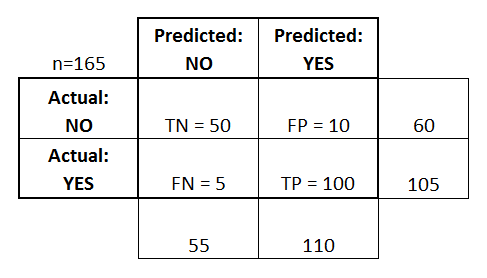

**유명한 암 사례:**  
* TP : 의사가 '있다'(질병이 있음)라고 예측하고 질병이 있는 경우를 **참 양성(TP)**라고 한다. (의사가 환자에게 질병이 있다고 정확하게 예측했다.)

* TN : 의사가 '없다'(질병이 없음)라고 예측하고 질병이 없는 경우를 True Negatives(TN)이라고 한다. (의사가 환자에게 질병이 없다고 정확하게 예측했다.)

* 1종 오류 : 의사가 **'있다'**라고 예측했지만 질병이 **없는** 경우를 False Positives(FP)라고 한다. 

* 2종 오류 : 의사가 **'없다'**라고 예측했지만 질병이 **있는** 경우를 False Negatives(FN)이라고 한다.

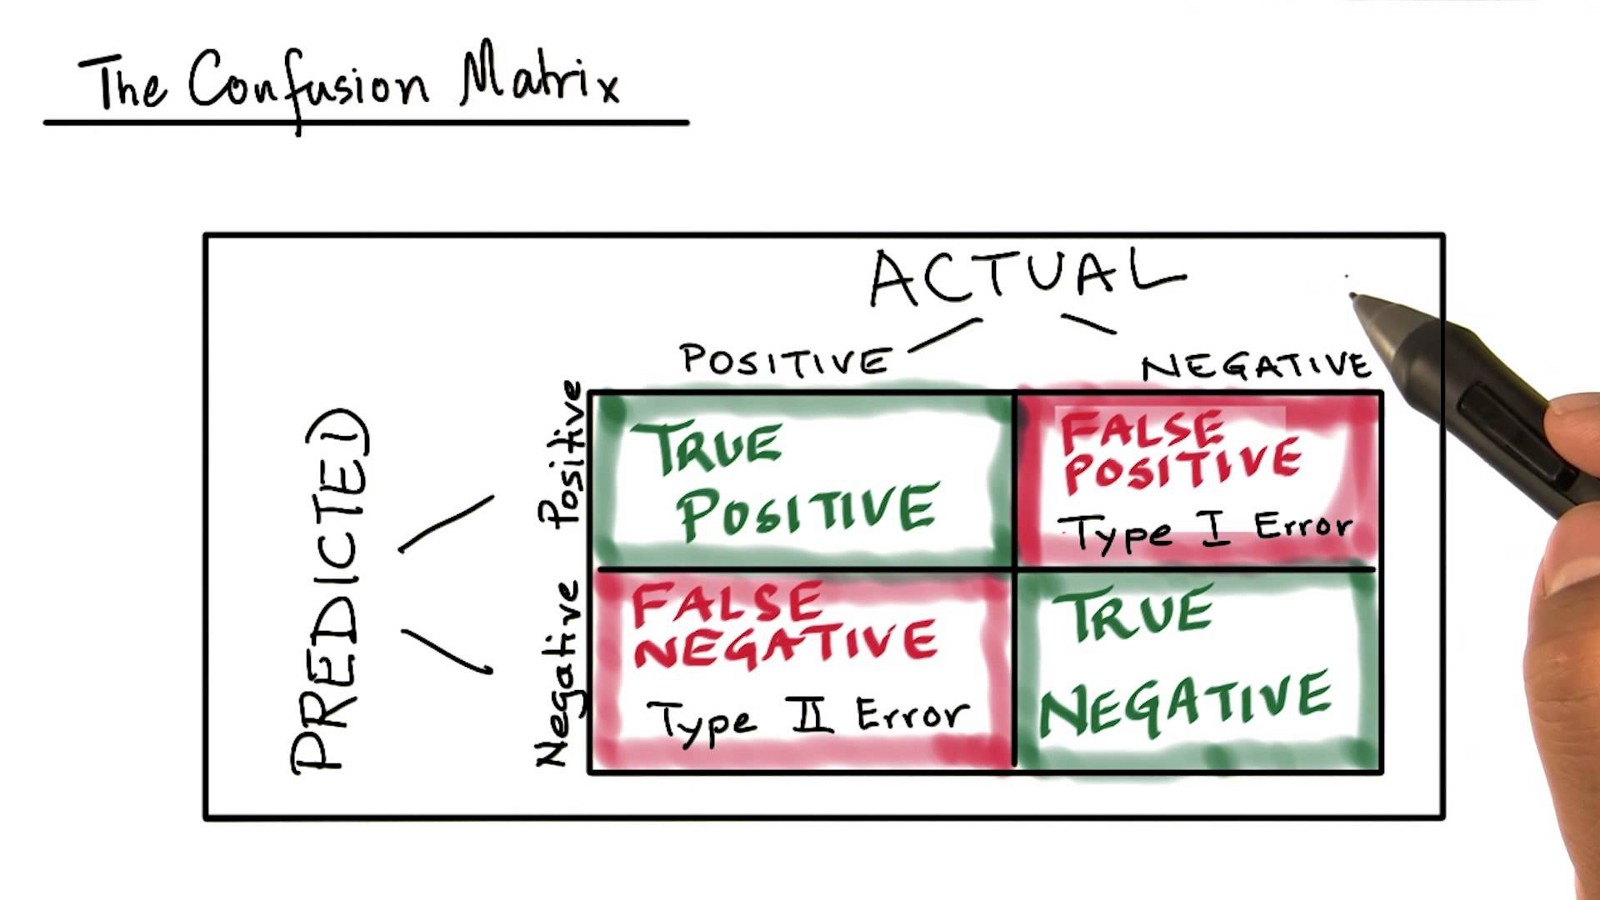

In [ ]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# 위의 적합했던 분류기를 사용해 예측을 얻는다.
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test ,y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,143,24,167
1,37,52,89
All,180,76,256


Text(0.5, 12.5, 'Predicted label')

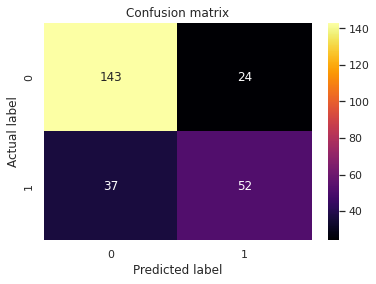

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='inferno', fmt='g')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 7.2 Classification Report
리포트는 Precision(정밀도), Recall(재현율), F1-Score(정확도)를 포함한다.

* Precision Score(정밀도)
        정밀도는 총 예측된 긍정적인 관찰에 대한 올바르게 예측된 긍정적인 관찰의 비율이다. 

        TP - True Positives
        FP - False Positives

        Precision - 긍정 예측의 정확성.
        Precision = TP/(TP + FP)

* Recall Score(재현율)
        재현율은 실제 클래스의 모든 관찰에 대한 올바르게 예측된 긍정적인 관찰의 비율이다.

        FN - False Negatives

        Recall(sensitivity or true positive rate) : 올바르게 식별된 긍정 비율
        Recall = TP / (TP+FN)


* F1 Score(정확도)
        F1 점수는 정밀도와 재현율의 가중 평균이다. 따라서 이 점수는 거짓 긍정과 거짓 부정을 모두 고려한다.
        
        F1 Score (F-score or F-Measure) - 두 분류자를 비교하는데 유용한 측정항목이다. 
        F1 Score는 정밀도와 재현율을 고려한다. 
        정밀도와 재현율의 조화 평균을 찾아 생성한다.
       
        F1 = 2 * (precision * recall)/(precision + recall)

In [ ]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       167
           1       0.68      0.58      0.63        89

    accuracy                           0.76       256
   macro avg       0.74      0.72      0.73       256
weighted avg       0.76      0.76      0.76       256



## 7.3 ROC - AUC
ROC(Receiver Operating Characteristic) Curve는 모델이 두 가지를 얼마나 잘 구별할 수 있는지 알려준다 (ex-환자에게 질병이 있는지 여부). 더 나은 모델은 둘을 정확하게 구별할 수 있다. 반면 열악한 모델은 두가지를 구별하는데 어려움을 겪을 것이다.

> [ROC-AUC 설명 영상](https://www.youtube.com/watch?v=OAl6eAyP-yo)

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

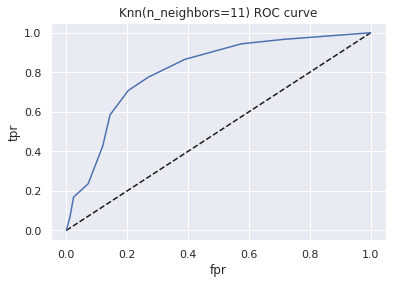

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
# Area ubder ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba)

0.8072730942609163

## 7.4 Hyper Parameter optimization
Grid Search는 그리드에 지정된 알고리즘 매개 변수의 각 조합에 대해 모델을 체계적으로 구축하고 평가하는 하이퍼 파라미터 튜닝에 대한 접근법이다. 

**다음 예를 살펴보자 :**  
머신러닝 모델 X가 하이퍼파라미터 a1, a2 및 a3을 취한다고 가정한다. Grid Search에서는 먼저 하이퍼 파라미터 a1, a2 및 a3에 대한 값 범위를 정의한다. 각 하이퍼 파라미터에 대한 값의 배열이라고 생각할 수 있다. 이제 Grid Search는 처음에 정의한 모든 가능한 하이퍼 파라미터(a1, a2, a3)값의 조합을 사용해 많은 버전의 X를 구성한다. 이러한 초 매개 변수 값의 범위를 그리드라고 한다.  

그리드를 다음과 같이 정의했다고 가정한다.   
a1 = [0, 1, 2, 3, 4, 5]  
a2 = [10, 20, 30, 40, 50]  
a3 = [105, 105, 110, 120, 125]
   
하이퍼 파라미터에 대해 정의하는 값의 배열은 하이퍼 파라미터가 정수 값만 사용하는 경우 배열에 부동 유형 값을 제공할 수 없다는 점에서 적법해야 한다.   

이제 Grid Search는 방금 정의한 그리드로 여러 버전의 X를 구성하는 과정을 시작할 것이다.   

이는 [0, 10, 105]의 조합으로 시작해 [5, 60, 125]로 끝난다. 그것은 Grid Search를 계산적으로 매우 비싸게 만드는 이 둘 사이의 모든 중간 조합을 통과할 것이다. 




In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# knn과 같은 경우 조정할 매개변수는 n_neighbors이다.
param_grid = {'n_neighbors' : np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)

print(f"Best Score : {str(knn_cv.best_score_)}")
print(f"Best Parameters : {str(knn_cv.best_params_)}")

Best Score : 0.7748068924539513
Best Parameters : {'n_neighbors': 25}
